# 1. Linear Regression
## 공부 시간에 따른 시험 점수

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

### 데이터 불러오기

In [3]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [4]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


### 독립변수, 종속변수 분리하기

In [8]:
X = dataset.iloc[:, :-1].values # iloc[row, col] # 독립변수 : 처음부터 마지막 컬럼 직전까지의 데이터
y = dataset.iloc[:, -1].values # 종속변수 : 마지막 컬럼 데이터

In [9]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

### 객채를 만들고, fit함수를 통해 학습 시킴

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # fit으로 훈련시킴

LinearRegression()

### predict함수를 통해 예측값 출력하기

In [11]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

### 데이터 시각화 하기

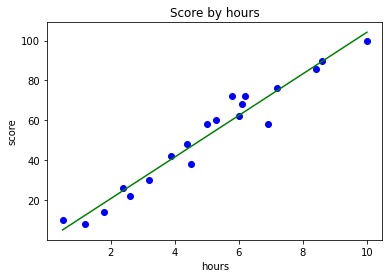

In [13]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green') # y값에 예측값을 넣어줌
plt.title("Score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [18]:
print("9시간 공부했을 때 예상 점수 : ", reg.predict([[9]])) # 2차원 배열 형태로 맞춰서 넣어주기 [[9], [8], [7]]

9시간 공부했을 때 예상 점수 :  [93.77478776]


### 기울기와 절편 확인하기

In [19]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [20]:
reg.intercept_ # y절편 (b)

-0.218484702867201

y = mx + b -> y = 10.4436x - 0.2184

## 데이터 세트 분리

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [23]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [25]:
from sklearn.model_selection import train_test_split # tuple형태로 값이 4개로 나눠짐
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 훈련80 테스트20

In [26]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [27]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [28]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [29]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [31]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [32]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [34]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

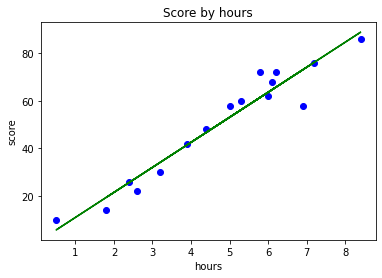

In [35]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green') # y값에 예측값을 넣어줌
plt.title("Score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트 세트)

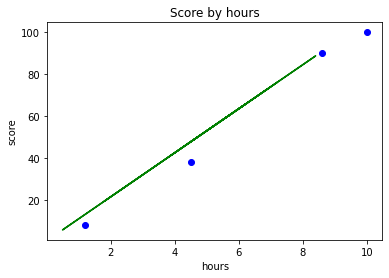

In [37]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green') # y값에 예측값을 넣어줌 # 모델은 같음
plt.title("Score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [38]:
reg.coef_

array([10.49161294])

In [39]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [42]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [43]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

## 경사 하강법 (Gradient Descent)

#지수표기법
1e-3 : 0.001 (10^-3)
1e-4 : 0.0001 (10^-4)
1e+3 : 1000 (10^3)
1e+4 : 10000 (10^4)

max_iter : 훈련세트 반복 횟수 (Epoch 횟수)
eta0 : 학습률 (learning rate)
verbose : 훈련세트를 반복하면서 손실이 어떻게 줄어드는지 보여줌(loss)

In [64]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법
# sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

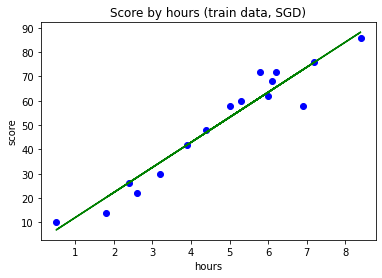

In [65]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green') # y값에 예측값을 넣어줌 # 모델은 같음
plt.title("Score by hours (train data, SGD)")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [50]:
# 훈련 데이터 평가점수와 비교 ; reg.coef : 10.4916, reg.intercept : 0.6115
sr.coef_

array([10.21221449])

In [51]:
sr.intercept_

array([1.69666081])

### 모델평가

In [53]:
sr.score(X_test, y_test)

0.9747740823481588

In [52]:
sr.score(X_train, y_train) # 좋은 모델은 훈련세트 점수가 더 높음

0.9348954682003968